In [1]:
import pydot
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.exceptions import NotFittedError

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier

from IPython.display import display

# Path of datasets
path_train = 'B:\\program\\python\\kaggle\\titanic\\train.csv'
path_test = 'B:\\program\\python\\kaggle\\titanic\\test.csv'

train_df_raw = pd.read_csv(path_train)
train_df_raw.head()

Using TensorFlow backend.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
train_df_raw.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<IPython.core.display.Javascript object>


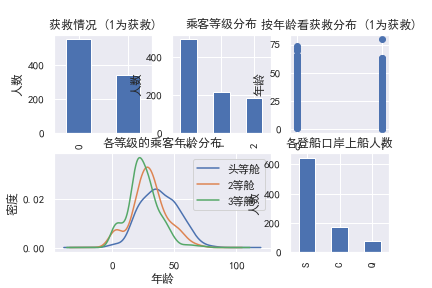

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt



plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False


fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

plt.subplot2grid((2,3),(0,0))             # 在一张大图里分列几个小图
train_df_raw.Survived.value_counts().plot(kind='bar')# 柱状图 
plt.title("获救情况 (1为获救)") # 标题
plt.ylabel("人数")  

plt.subplot2grid((2,3),(0,1))
train_df_raw.Pclass.value_counts().plot(kind="bar")
plt.ylabel(u"人数")
plt.title(u"乘客等级分布")

plt.subplot2grid((2,3),(0,2))
plt.scatter(train_df_raw.Survived, train_df_raw.Age)
plt.ylabel(u"年龄")                         # 设定纵坐标名称
plt.grid(b=True, which='major', axis='y') 
plt.title(u"按年龄看获救分布 (1为获救)")


plt.subplot2grid((2,3),(1,0), colspan=2)
train_df_raw.Age[train_df_raw.Pclass == 1].plot(kind='kde')   
train_df_raw.Age[train_df_raw.Pclass == 2].plot(kind='kde')
train_df_raw.Age[train_df_raw.Pclass == 3].plot(kind='kde')
plt.xlabel(u"年龄")# plots an axis lable
plt.ylabel(u"密度") 
plt.title(u"各等级的乘客年龄分布")
plt.legend((u'头等舱', u'2等舱',u'3等舱'),loc='best') # sets our legend for our graph.


plt.subplot2grid((2,3),(1,2))
train_df_raw.Embarked.value_counts().plot(kind='bar')
plt.title(u"各登船口岸上船人数")
plt.ylabel(u"人数")  
plt.show()


<IPython.core.display.Javascript object>


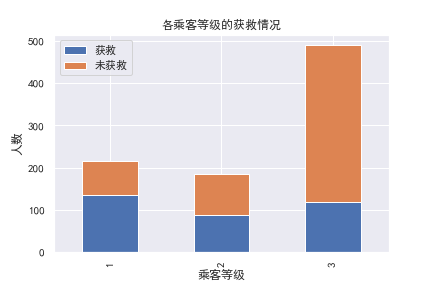

In [4]:
#看看各乘客等级的获救情况
#fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = train_df_raw.Pclass[train_df_raw.Survived == 0].value_counts()
Survived_1 = train_df_raw.Pclass[train_df_raw.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"各乘客等级的获救情况")
plt.xlabel(u"乘客等级") 
plt.ylabel(u"人数") 
plt.show()


<IPython.core.display.Javascript object>


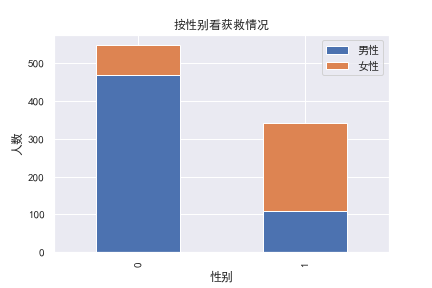

In [5]:
#看看各性别的获救情况
#fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_m = train_df_raw.Survived[train_df_raw.Sex == 'male'].value_counts()
Survived_f = train_df_raw.Survived[train_df_raw.Sex == 'female'].value_counts()
df=pd.DataFrame({u'男性':Survived_m, u'女性':Survived_f})
df.plot(kind='bar', stacked=True)
plt.title(u"按性别看获救情况")
plt.xlabel(u"性别") 
plt.ylabel(u"人数")
plt.show()


<IPython.core.display.Javascript object>


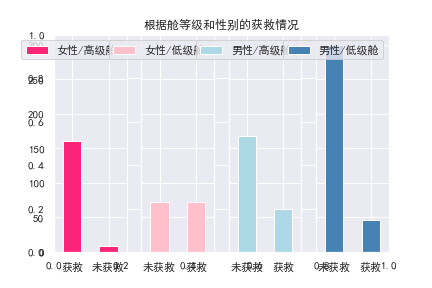

In [6]:

 #然后我们再来看看各种舱级别情况下各性别的获救情况
fig=plt.figure()
fig.set(alpha=0.65) # 设置图像透明度，无所谓
plt.title(u"根据舱等级和性别的获救情况")

ax1=fig.add_subplot(141)
train_df_raw.Survived[train_df_raw.Sex == 'female'][train_df_raw.Pclass != 3].value_counts().plot(kind='bar', label="female highclass", color='#FA2479')
ax1.set_xticklabels([u"获救", u"未获救"], rotation=0)
ax1.legend([u"女性/高级舱"], loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
train_df_raw.Survived[train_df_raw.Sex == 'female'][train_df_raw.Pclass == 3].value_counts().plot(kind='bar', label='female, low class', color='pink')
ax2.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"女性/低级舱"], loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
train_df_raw.Survived[train_df_raw.Sex == 'male'][train_df_raw.Pclass != 3].value_counts().plot(kind='bar', label='male, high class',color='lightblue')
ax3.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"男性/高级舱"], loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
train_df_raw.Survived[train_df_raw.Sex == 'male'][train_df_raw.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='steelblue')
ax4.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"男性/低级舱"], loc='best')

plt.show()



<IPython.core.display.Javascript object>


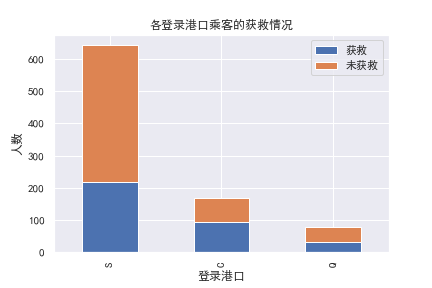

In [7]:
#fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = train_df_raw.Embarked[train_df_raw.Survived == 0].value_counts()
Survived_1 = train_df_raw.Embarked[train_df_raw.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"各登录港口乘客的获救情况")
plt.xlabel(u"登录港口") 
plt.ylabel(u"人数") 

plt.show()


In [8]:
g = train_df_raw.groupby(['SibSp','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
df

PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7

In [9]:
all_sib = pd.DataFrame(train_df_raw.groupby(['SibSp']).count()['PassengerId'])
df_divi = df / all_sib
df['percentage'] = df_divi['PassengerId']
df

PassengerId  percentage
SibSp Survived                         
0     0                 398    0.654605
      1                 210    0.345395
1     0                  97    0.464115
      1                 112    0.535885
2     0                  15    0.535714
      1                  13    0.464286
3     0                  12    0.750000
      1                   4    0.250000
4     0                  15    0.833333
      1                   3    0.166667
5     0                   5    1.000000
8     0                   7    1.000000

In [10]:
g = train_df_raw.groupby(['Parch','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
all_sib = pd.DataFrame(train_df_raw.groupby(['Parch']).count()['PassengerId'])
df_divi = df / all_sib
df['percentage'] = df_divi['PassengerId']
df


PassengerId  percentage
Parch Survived                         
0     0                 445    0.656342
      1                 233    0.343658
1     0                  53    0.449153
      1                  65    0.550847
2     0                  40    0.500000
      1                  40    0.500000
3     0                   2    0.400000
      1                   3    0.600000
4     0                   4    1.000000
5     0                   4    0.800000
      1                   1    0.200000
6     0                   1    1.000000

In [11]:
#ticket是船票编号，应该是unique的，和最后的结果没有太大的关系，先不纳入考虑的特征范畴把
#cabin只有204个乘客有值，我们先看看它的一个分布
train_df_raw.Cabin.value_counts()

C23 C25 C27        4
G6                 4
B96 B98            4
F33                3
E101               3
D                  3
F2                 3
C22 C26            3
D35                2
C123               2
E121               2
B49                2
B22                2
C68                2
C93                2
B58 B60            2
B77                2
B51 B53 B55        2
F4                 2
E33                2
D36                2
C65                2
C126               2
B28                2
C92                2
E25                2
E8                 2
B57 B59 B63 B66    2
C124               2
E44                2
                  ..
A10                1
A20                1
D50                1
D30                1
B41                1
E34                1
B101               1
E12                1
B30                1
C128               1
C70                1
E49                1
A16                1
B73                1
E40                1
B3                 1
C46          

<IPython.core.display.Javascript object>


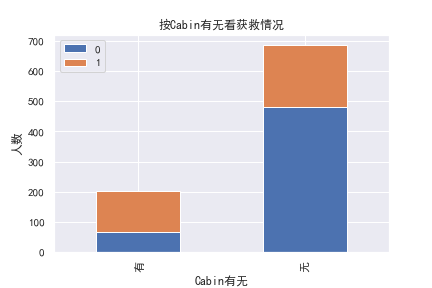

In [12]:

#fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_cabin = train_df_raw.Survived[pd.notnull(train_df_raw.Cabin)].value_counts()
Survived_nocabin = train_df_raw.Survived[pd.isnull(train_df_raw.Cabin)].value_counts()
df=pd.DataFrame({u'有':Survived_cabin, u'无':Survived_nocabin}).transpose()
df.plot(kind='bar', stacked=True)
plt.title(u"按Cabin有无看获救情况")
plt.xlabel(u"Cabin有无") 
plt.ylabel(u"人数")
plt.show()



In [13]:
from sklearn.ensemble import RandomForestRegressor

def set_missing_ages(df):
    age_df = df[['Age','Fare','Parch','SibSp','Pclass']]
    
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()
    #print(known_age)
    
    y = known_age[:, 0]
    X = known_age[:, 1:]
    
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    
    predictedAges = rfr.predict(unknown_age[:, 1::])
    df.loc[(df.Age.isnull()), 'Age'] = predictedAges
    
    return df, rfr

def set_Cabin_type(df):
    df.loc[(df.Cabin.notnull()), 'Cabin'] = 'Yes'
    df.loc[(df.Cabin.isnull()), 'Cabin'] = 'No'
    
    return df

data_train, rfr = set_missing_ages(train_df_raw)
data_train = set_Cabin_type(data_train)
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,No,S
5,6,0,3,"Moran, Mr. James",male,23.838953,0,0,330877,8.4583,No,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,Yes,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,No,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,No,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,No,C


In [14]:
dummies_Cabin = pd.get_dummies(data_train['Cabin'], prefix='Cabin')
dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix='Embarked')
dummies_Sex = pd.get_dummies(data_train['Sex'], prefix='Sex')
dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix='Pclass')

df = pd.concat([data_train,dummies_Cabin,dummies_Embarked,dummies_Sex,dummies_Pclass], axis=1)
df.drop(['Pclass','Name','Sex','Ticket','Cabin','Embarked'], axis=1, inplace=True)
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1
5,6,0,23.838953,0,0,8.4583,1,0,0,1,0,0,1,0,0,1
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,0,1,1,0,0
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,1,0,0,1
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,1,0,0,0,1
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,1,0,0,1,0


In [15]:
import sklearn.preprocessing as preprocessing

scaler = preprocessing.StandardScaler()
age_scale_param = scaler.fit(df[['Age']])
df['Age_scaled'] = scaler.fit_transform(df[['Age']], age_scale_param)
fare_scale_param = scaler.fit(df[['Fare']])
df['Fare_scaled'] = scaler.fit_transform(df[['Fare']], fare_scale_param)
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1,-0.561380,-0.502445
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0,0.613171,0.786845
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1,-0.267742,-0.488854
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0,0.392942,0.420730
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,0.392942,-0.486337
5,6,0,23.838953,0,0,8.4583,1,0,0,1,0,0,1,0,0,1,-0.426384,-0.478116
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,0,1,1,0,0,1.787722,0.395814
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,1,0,0,1,-2.029569,-0.224083
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,1,0,0,0,1,-0.194333,-0.424256
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,1,0,0,1,0,-1.148655,-0.042956


In [16]:
from sklearn import linear_model

train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.as_matrix()

y = train_np[:, 0]
X = train_np[:, 1:]

clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(X, y)
train_np

array([[ 0.        ,  1.        ,  0.        , ...,  1.        ,
        -0.56138008, -0.50244517],
       [ 1.        ,  1.        ,  0.        , ...,  0.        ,
         0.61317075,  0.78684529],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
        -0.26774237, -0.48885426],
       ...,
       [ 0.        ,  1.        ,  2.        , ...,  1.        ,
        -0.98759887, -0.17626324],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.26774237, -0.04438104],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.17271419, -0.49237783]])

In [17]:
data_test = pd.read_csv('B:\\program\\python\\kaggle\\titanic\\test.csv')
data_test.loc[(data_test.Fare.isnull()), 'Fare'] = 0

tmp_df = data_test[['Age','Fare','Parch','SibSp','Pclass']]
null_age = tmp_df[data_test.Age.isnull()].as_matrix()

X = null_age[:, 1:]
predictedAges = rfr.predict(X)
data_test.loc[(data_test.Age.isnull()), 'Age'] = predictedAges

data_test = set_Cabin_type(data_test)
dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix= 'Pclass')


df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df_test['Age_scaled'] = scaler.fit_transform(df_test[['Age']], age_scale_param)
df_test['Fare_scaled'] = scaler.fit_transform(df_test[['Fare']], fare_scale_param)
df_test


,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,892,34.500000,0,0,7.8292,1,0,0,1,0,0,1,0,0,1,0.307521,-0.496637
1,893,47.000000,1,0,7.0000,1,0,0,0,1,1,0,0,0,1,1.256241,-0.511497
2,894,62.000000,0,0,9.6875,1,0,0,1,0,0,1,0,1,0,2.394706,-0.463335
3,895,27.000000,0,0,8.6625,1,0,0,0,1,0,1,0,0,1,-0.261711,-0.481704
4,896,22.000000,1,1,12.2875,1,0,0,0,1,1,0,0,0,1,-0.641199,-0.416740
5,897,14.000000,0,0,9.2250,1,0,0,0,1,0,1,0,0,1,-1.248380,-0.471623
6,898,30.000000,0,0,7.6292,1,0,0,1,0,1,0,0,0,1,-0.034018,-0.500221
7,899,26.000000,1,1,29.0000,1,0,0,0,1,0,1,0,1,0,-0.337609,-0.117238
8,900,18.000000,0,0,7.2292,1,0,1,0,0,1,0,0,0,1,-0.944790,-0.507390
9,901,21.000000,2,0,24.1500,1,0,0,0,1,0,1,0,0,1,-0.717097,-0.204154


In [18]:
test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
result.to_csv('B:\\program\\python\\kaggle\\titanic\\logistic_regression_predictions.csv', index=False)


In [19]:
pd.DataFrame({'columns':list(train_df.columns[1:]), 'coef':list(clf.coef_.T)})

,columns,coef
0,SibSp,[-0.3442356354034553]
1,Parch,[-0.10491594114947858]
2,Cabin_No,[0.0]
3,Cabin_Yes,[0.9021086552336286]
4,Embarked_C,[0.0]
5,Embarked_Q,[0.0]
6,Embarked_S,[-0.41726283807058073]
7,Sex_female,[1.956570412698808]
8,Sex_male,[-0.6774215208103744]
9,Pclass_1,[0.3411587754275818]


In [20]:
from sklearn.model_selection import cross_validate 

clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
all_data = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
X = all_data.as_matrix()[:,1:]
y = all_data.as_matrix()[:,0]
print(cross_validate(clf, X, y, cv=5))


{'fit_time': array([0., 0., 0., 0., 0.]), 'score_time': array([0., 0., 0., 0., 0.]), 'test_score': array([0.81564246, 0.81564246, 0.78651685, 0.78651685, 0.81355932]), 'train_score': array([0.80617978, 0.8244382 , 0.81065919, 0.81065919, 0.81092437])}


In [21]:
from sklearn.model_selection import train_test_split, learning_curve

split_train, split_cv = train_test_split(train_df_raw, test_size=0.3, random_state=0)
train_df = split_train.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')

clf.fit(train_df.as_matrix()[:,1:], train_df.as_matrix()[:,0])

cv_df = split_cv.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(cv_df.as_matrix()[:,1:])

bad_cases = train_df_raw.loc[train_df_raw['PassengerId'].isin(split_cv[predictions != cv_df.as_matrix()[:,0]]['PassengerId'].values)]

bad_cases

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,No,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.000000,1,1,PP 9549,16.7000,Yes,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,36.108048,1,0,PC 17569,146.5208,Yes,C
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.000000,1,0,2651,11.2417,No,C
55,56,1,1,"Woolner, Mr. Hugh",male,44.064830,0,0,19947,35.5000,Yes,S
65,66,1,3,"Moubarek, Master. Gerios",male,17.099916,1,1,2661,15.2458,No,C
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.000000,4,2,3101281,7.9250,No,S
79,80,1,3,"Dowdell, Miss. Elizabeth",female,30.000000,0,0,364516,12.4750,No,S
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.000000,3,0,3101278,15.8500,No,S


<IPython.core.display.Javascript object>


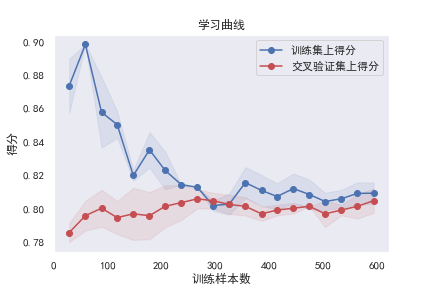

(0.8065696844854024, 0.018258876711338634)

In [22]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, 
                       train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    train_sizes, train_scores, test_scores = learning_curve(estimator,X,y,cv=cv,n_jobs=n_jobs,
                                                           train_sizes=train_sizes,verbose=verbose)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel('训练样本数')    
        plt.ylabel('得分')
        #plt.gca().invert_yaxis()
        plt.grid()
        
        plt.fill_between(train_sizes, train_scores_mean-train_scores_std, train_scores_mean+train_scores_std,
                        alpha=0.1, color='b')
        plt.fill_between(train_sizes, test_scores_mean-test_scores_std, test_scores_mean+test_scores_std,
                        alpha=0.1, color='r')
        plt.plot(train_sizes, train_scores_mean, 'o-', color='b', label='训练集上得分')
        plt.plot(train_sizes, test_scores_mean, 'o-', color='r', label='交叉验证集上得分')
        
        plt.legend(loc='best')
        
        plt.draw()
        plt.show()
        #plt.gca().invert_yaxis()
        
    midpoint = ((train_scores_mean[-1]+train_scores_std[-1]) + (test_scores_mean[-1]-test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1]+train_scores_std[-1]) - (test_scores_mean[-1]-test_scores_std[-1])
    return midpoint, diff

plot_learning_curve(clf, '学习曲线', X, y)

In [25]:
from sklearn.ensemble import BaggingRegressor

train_df = train_df_raw.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')
train_np = train_df.as_matrix()

y = train_np[:, 0]
X = train_np[:, 1:]

clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
bagging_clf = BaggingRegressor(clf, n_estimators=20, max_samples=0.8, max_features=1.0, bootstrap=True,
                                     bootstrap_features=False, n_jobs=-1)
bagging_clf.fit(X, y)

test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')
predictions = bagging_clf.predict(test)

result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
result.to_csv('B:\\program\\python\\kaggle\\titanic\\logistic_regression_predictions.csv', index=False)


In [27]:
train_df_raw.sum()

PassengerId                                               397386
Survived                                                     342
Pclass                                                      2057
Name           Braund, Mr. Owen HarrisCumings, Mrs. John Brad...
Sex            malefemalefemalefemalemalemalemalemalefemalefe...
Age                                                      26415.7
SibSp                                                        466
Parch                                                        340
Ticket         A/5 21171PC 17599STON/O2. 31012821138033734503...
Fare                                                     28693.9
Cabin          NoYesNoYesNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoN...
dtype: object